In [ ]:
from google.colab import files
data=files.upload()

Saving mlprojectdataset2.csv to mlprojectdataset2 (1).csv


In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv('mlprojectdataset2.csv')
print('uploaded sucessfully')

uploaded sucessfully


In [ ]:
print(df.shape)
print(df.info())

(1151, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_id                   1135 non-null   object 
 1   product_name                 1132 non-null   object 
 2   category                     1095 non-null   object 
 3   price                        1134 non-null   float64
 4   discount                     1122 non-null   float64
 5   average_rating               1130 non-null   float64
 6   num_reviews                  1132 non-null   float64
 7   review_variance              1139 non-null   float64
 8   description_keywords         1131 non-null   object 
 9   title_similarity             1128 non-null   float64
 10  image_quality_score          1126 non-null   float64
 11  seller_id                    533 non-null    object 
 12  seller_rating                1135 non-null   float64
 13  seller_

In [ ]:
df.head()

,product_id,product_name,category,price,discount,average_rating,num_reviews,review_variance,description_keywords,title_similarity,...,seller_rating,seller_tenure_months,return_rate,shipping_time_days,complaint_count,verified_seller,price_to_market_avg_ratio,rating_to_review_ratio,discount_rating_correlation,genuine_label
0,P0001,Nova Smartwatch Pro,Electronics,4521.34,18.45,4.32,287.0,0.84,authentic genuine,0.892,...,4.56,42.0,3.21,3.0,2.0,1.0,0.904268,0.015052,79.70,1.0
1,P0002,Zara Cotton Shirt,Fashion,892.15,12.30,4.67,156.0,0.62,premium warranty,0.941,...,4.78,38.0,2.14,2.0,1.0,1.0,0.178430,0.029936,57.44,1.0
2,P0003,Elite Home Blender,Home,3245.89,22.15,3.89,412.0,1.23,original sealed,0.823,...,4.12,29.0,5.67,4.0,3.0,1.0,0.649178,0.009442,86.16,1.0
3,P0004,Glow Beauty Serum,Beauty,1567.42,8.90,4.78,523.0,0.45,authentic premium,0.967,...,4.89,51.0,1.23,2.0,0.0,1.0,0.313484,0.009141,42.54,1.0
4,P0005,Kidz Robot Toy,Toys,678.23,15.60,4.21,198.0,0.78,genuine warranty,0.887,...,4.34,33.0,3.45,3.0,2.0,1.0,0.135646,0.021263,65.68,1.0


##handle missing values

In [ ]:
df.isnull().sum()

,0
product_id,16
product_name,19
category,56
price,17
discount,29
average_rating,21
num_reviews,19
review_variance,12
description_keywords,20
title_similarity,23


In [ ]:
df.drop(columns=['seller_id'],inplace=True) #dropped because more null values in this

In [ ]:
#for categorical colums
df['product_name'].fillna("Unknown product",inplace=True)
df['category'].fillna(df['category'].mode()[0],inplace=True)
df['description_keywords'].fillna("Unknown",inplace=True)
df['verified_seller'].fillna(df['verified_seller'].mode()[0],inplace=True)

/tmp/ipython-input-522077172.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['product_name'].fillna("Unknown product",inplace=True)
/tmp/ipython-input-522077172.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
#for numerical
num_cols = ['price', 'discount', 'average_rating', 'num_reviews', 'review_variance',
            'title_similarity', 'image_quality_score', 'seller_rating',
            'seller_tenure_months', 'return_rate', 'shipping_time_days', 'complaint_count',
            'price_to_market_avg_ratio', 'rating_to_review_ratio', 'discount_rating_correlation']

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-1681626595.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
# Drop rows where target label is missing
df.dropna(subset=['genuine_label'], inplace=True)

In [ ]:
print("✅ Missing values handled successfully.")
print(df.isnull().sum())

✅ Missing values handled successfully.
product_id                     14
product_name                    0
category                        0
price                           0
discount                        0
average_rating                  0
num_reviews                     0
review_variance                 0
description_keywords            0
title_similarity                0
image_quality_score             0
seller_rating                   0
seller_tenure_months            0
return_rate                     0
shipping_time_days              0
complaint_count                 0
verified_seller                 0
price_to_market_avg_ratio       0
rating_to_review_ratio          0
discount_rating_correlation     0
genuine_label                   0
dtype: int64


##Fix datatypes

In [ ]:
df['verified_seller'] = df['verified_seller'].astype(int)
df['seller_tenure_months'] = df['seller_tenure_months'].astype(int)

##encode categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encode verified_seller
le = LabelEncoder()
df['verified_seller'] = le.fit_transform(df['verified_seller'])

# One-hot encode 'category'
df = pd.get_dummies(df, columns=['category'], drop_first=True)

##EDA

In [ ]:
df.describe()

,price,discount,average_rating,num_reviews,review_variance,title_similarity,image_quality_score,seller_rating,seller_tenure_months,return_rate,shipping_time_days,complaint_count,verified_seller,price_to_market_avg_ratio,rating_to_review_ratio,discount_rating_correlation,genuine_label
count,1.079000e+03,1.079000e+03,1.079000e+03,1.079000e+03,1079.000000,1079.000000,1079.000000,1.079000e+03,1079.000000,1.079000e+03,1079.000000,1.079000e+03,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000
mean,5.268157e-17,-1.053631e-16,1.053631e-16,1.119483e-16,1.171458,0.747532,0.715674,-7.704680e-16,26.503244,3.951118e-17,6.063021,-4.609638e-17,0.574606,1.182317,0.016031,89.575310,0.620945
std,1.000464e+00,1.000464e+00,1.000464e+00,1.000464e+00,0.455054,0.143489,0.155102,1.000464e+00,11.027615,1.000464e+00,3.458972,1.000464e+00,0.494632,0.975532,0.011883,27.929517,0.485377
min,-1.190925e+00,-1.620618e+00,-3.704396e+00,-1.949849e+00,0.290000,0.356000,0.111000,-3.880331e+00,1.000000,-1.184511e+00,2.000000,-1.507886e+00,0.000000,0.030000,0.000000,18.580000,0.000000
25%,-8.639838e-01,-6.950696e-01,-5.063254e-01,-6.241180e-01,0.840000,0.678000,0.632000,-5.600285e-01,20.000000,-8.889096e-01,3.000000,-7.764269e-01,0.000000,0.375290,0.010000,72.410000,0.000000
50%,-2.209912e-01,-8.904923e-02,9.775449e-02,2.591370e-03,1.144000,0.754000,0.729000,1.064555e-01,26.000000,-1.443869e-01,6.000000,-4.496768e-02,1.000000,1.040000,0.011573,91.420000,1.000000
75%,6.515240e-01,4.950427e-01,7.136791e-01,5.509620e-01,1.428000,0.861000,0.845000,8.335289e-01,34.000000,4.738632e-01,8.000000,4.426718e-01,1.000000,1.795308,0.020000,109.365000,1.000000
max,3.252215e+00,7.237873e+00,5.617387e+00,8.493298e+00,3.236000,1.606000,1.603000,1.778724e+00,78.000000,5.501113e+00,30.000000,4.831427e+00,1.000000,11.850000,0.130000,221.440000,1.000000


#check taget value

<Axes: title={'center': 'Genuine vs Fake Distribution'}, xlabel='genuine_label'>

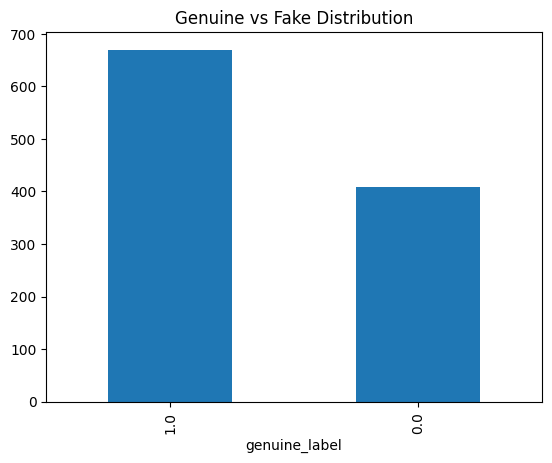

In [ ]:
df['genuine_label'].value_counts().plot(kind='bar', title='Genuine vs Fake Distribution')


##Numerical Features Distribution

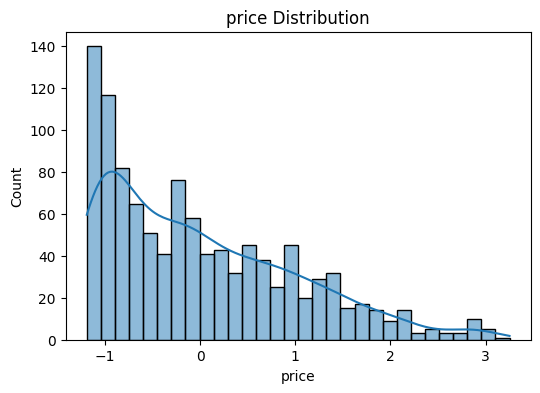

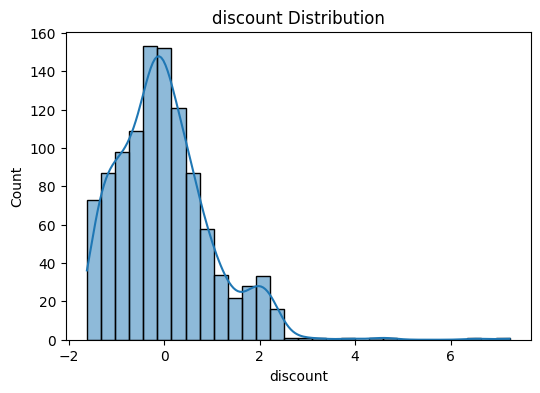

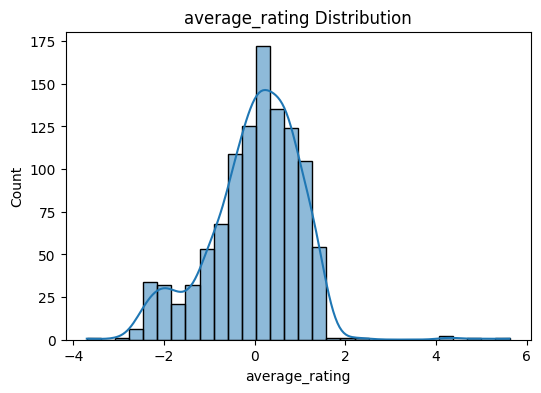

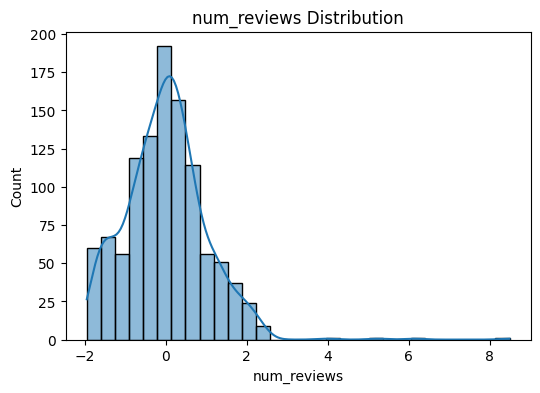

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['price', 'discount', 'average_rating', 'num_reviews']

for feature in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'{feature} Distribution')
    plt.show()

##Compare Numerical Features with Target

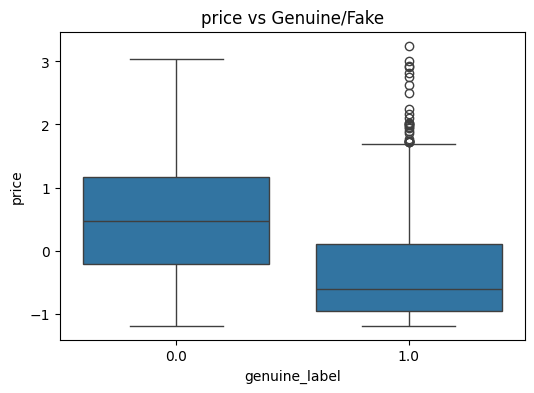

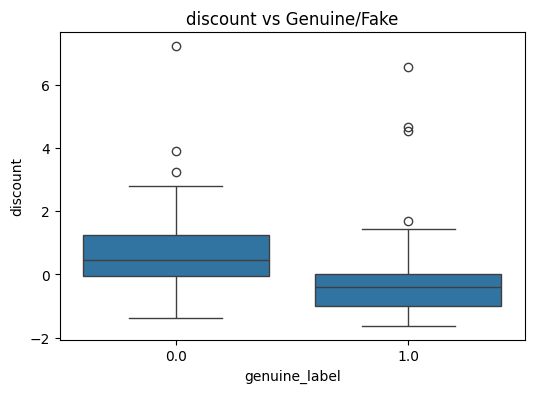

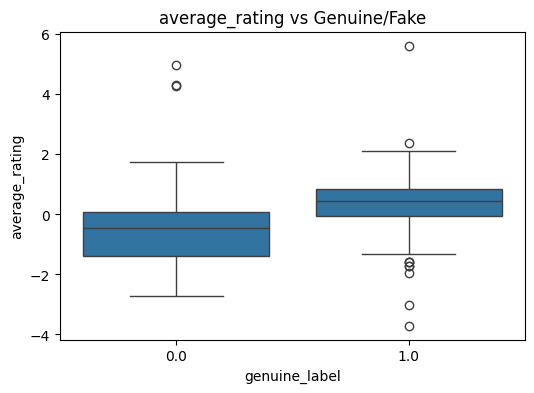

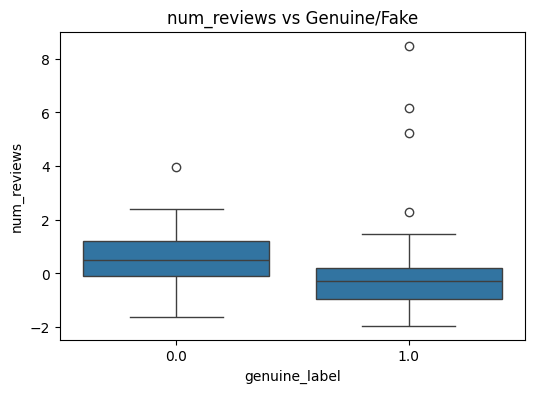

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='genuine_label', y=feature, data=df)
    plt.title(f'{feature} vs Genuine/Fake')
    plt.show()


##Categorical Features Analysis

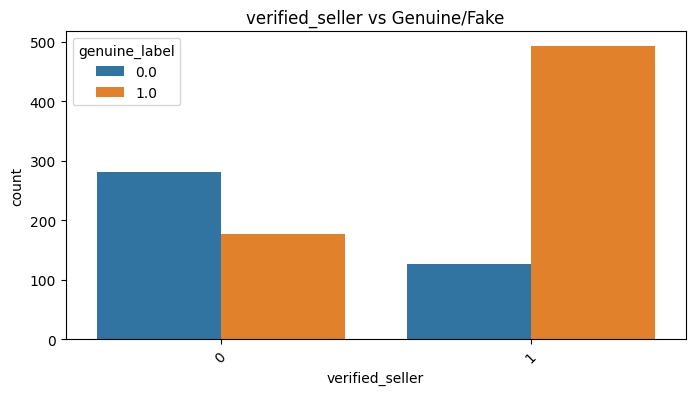

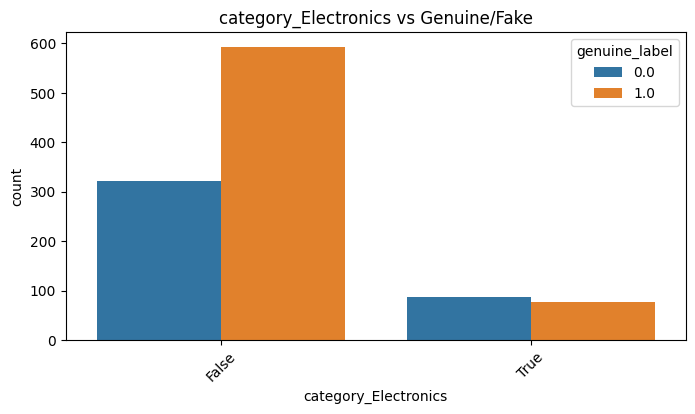

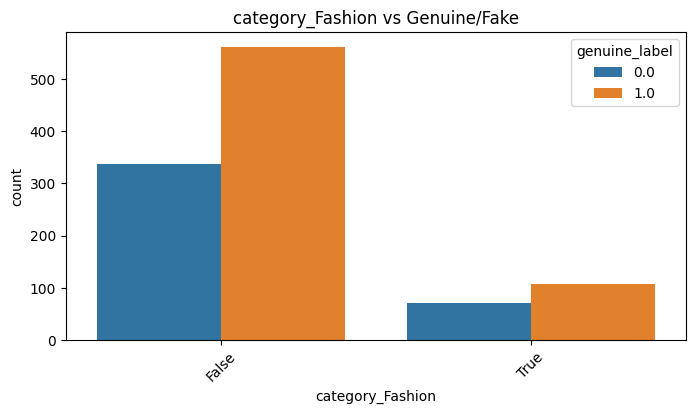

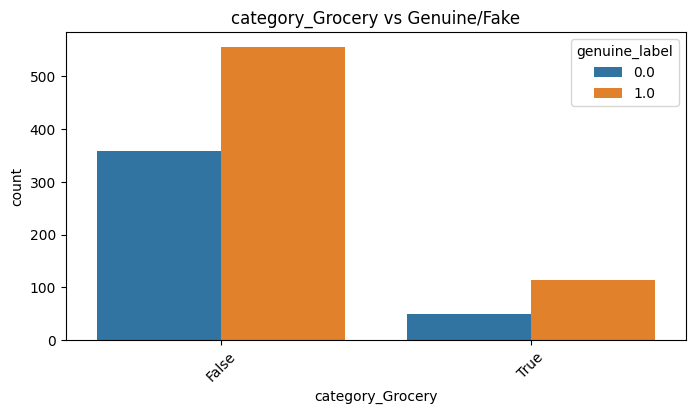

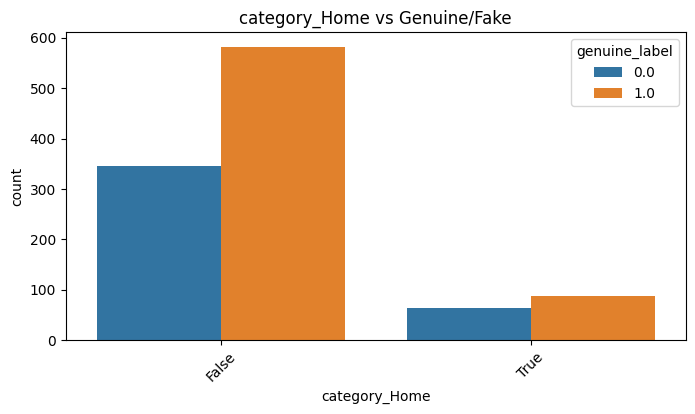

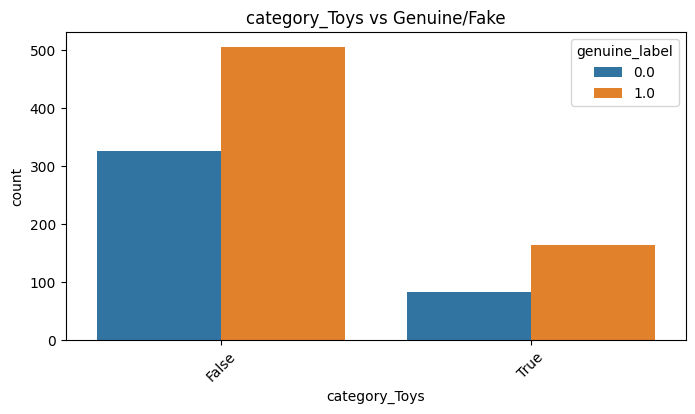

In [ ]:
categorical_features = ['verified_seller', 'category_Electronics', 'category_Fashion', 'category_Grocery', 'category_Home', 'category_Toys']

for feature in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=feature, hue='genuine_label', data=df)
    plt.title(f'{feature} vs Genuine/Fake')
    plt.xticks(rotation=45)
    plt.show()

##Correlation Matrix

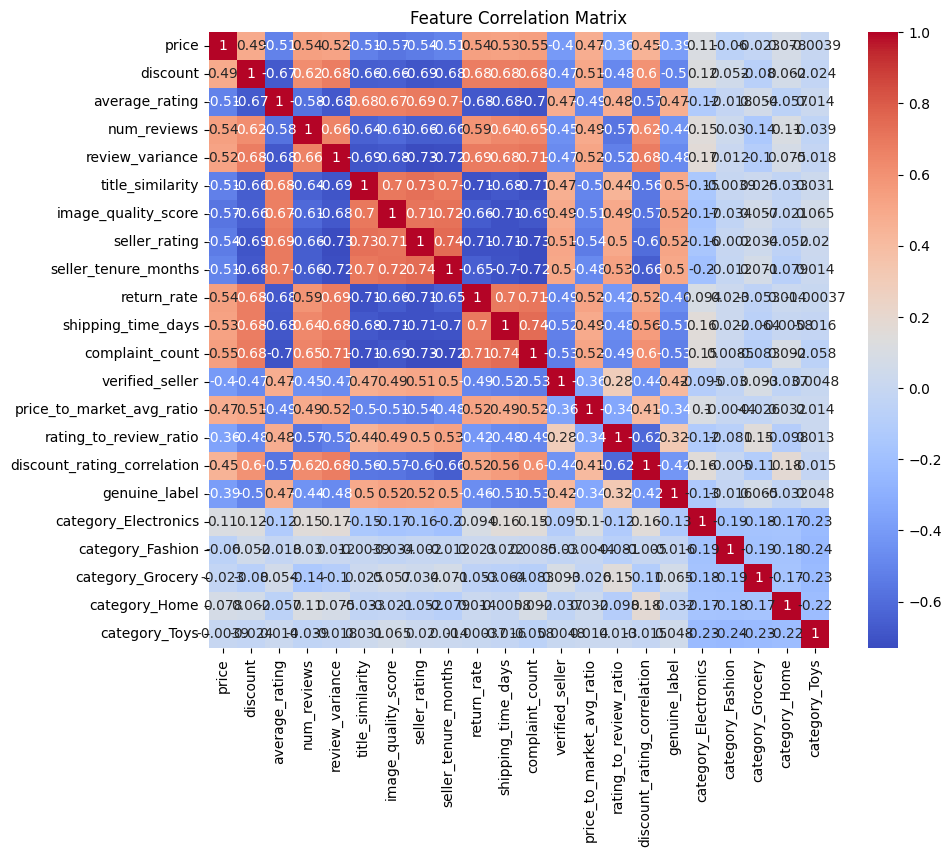

In [ ]:
corr = df.drop(['product_id', 'product_name', 'description_keywords'], axis=1).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

##Quick Feature Importance (Optional Pre-Model Check)

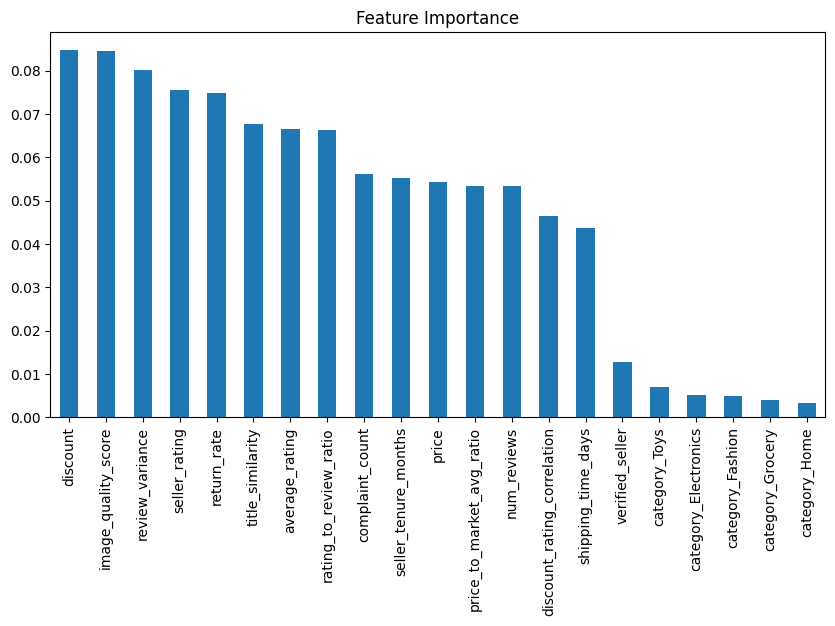

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['genuine_label', 'product_id', 'product_name', 'description_keywords'], axis=1)
y = df['genuine_label']

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance")
plt.show()

In [ ]:
df_fe = df.copy()

In [ ]:
df_fe['discount_strength'] = df_fe['discount'] / df_fe['price']

In [ ]:
df_fe['rating_review_ratio'] = df_fe['average_rating'] / (df_fe['num_reviews'] + 1)

In [ ]:
df_fe['complaint_ratio'] = df_fe['complaint_count'] / (df_fe['num_reviews'] + 1)

In [ ]:
df_fe['return_rating_ratio'] = df_fe['return_rate'] / (df_fe['seller_rating'] + 0.1)


In [ ]:
df_fe['adjusted_price_ratio'] = df_fe['price_to_market_avg_ratio'] * df_fe['discount_strength']

In [ ]:
df_fe['seller_trust_score'] = (
    (df_fe['seller_rating'] * 0.6) +
    (df_fe['verified_seller'] * 0.2) +
    ((1 - (df_fe['complaint_count'] / (df_fe['seller_tenure_months'] + 1))) * 0.2)
)

In [ ]:
df_fe[['description_keywords', 'title_similarity', 'image_quality_score']].dtypes

,0
description_keywords,object
title_similarity,float64
image_quality_score,float64


In [ ]:
cols = ['description_keywords', 'title_similarity', 'image_quality_score']
df_fe[cols] = df_fe[cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
df_fe[cols] = df_fe[cols].fillna(df_fe[cols].mean())

In [ ]:
df_fe['product_quality_score'] = (
    (df_fe['description_keywords'] * 0.4) +
    (df_fe['title_similarity'] * 0.3) +
    (df_fe['image_quality_score'] * 0.3)
)

In [ ]:
df_fe['authenticity_signal'] = (
    (df_fe['seller_trust_score'] * 0.5) +
    (df_fe['product_quality_score'] * 0.3) +
    ((1 - df_fe['discount_strength']) * 0.2)
)


In [ ]:
df_fe.columns

Index(['product_id', 'product_name', 'price', 'discount', 'average_rating',
       'num_reviews', 'review_variance', 'description_keywords',
       'title_similarity', 'image_quality_score', 'seller_rating',
       'seller_tenure_months', 'return_rate', 'shipping_time_days',
       'complaint_count', 'verified_seller', 'price_to_market_avg_ratio',
       'rating_to_review_ratio', 'discount_rating_correlation',
       'genuine_label', 'category_Electronics', 'category_Fashion',
       'category_Grocery', 'category_Home', 'category_Toys',
       'discount_strength', 'rating_review_ratio', 'complaint_ratio',
       'return_rating_ratio', 'adjusted_price_ratio', 'seller_trust_score',
       'product_quality_score', 'authenticity_signal'],
      dtype='object')

In [ ]:
for col in ['discount_strength', 'complaint_ratio', 'return_rating_ratio']:
    df_fe[col] = df_fe[col].clip(0, df_fe[col].quantile(0.99))

In [ ]:
df_fe.to_csv('final_feature_engineered_dataset.csv', index=False)

##kmeans



In [ ]:
features_for_clustering = [
    'price', 'discount', 'average_rating', 'num_reviews', 'review_variance',
    'description_keywords', 'title_similarity', 'image_quality_score',
    'seller_rating', 'seller_tenure_months', 'return_rate',
    'shipping_time_days', 'complaint_count', 'verified_seller',
    'price_to_market_avg_ratio', 'rating_to_review_ratio',
    'discount_rating_correlation', 'discount_strength', 'rating_review_ratio',
    'complaint_ratio', 'return_rating_ratio', 'adjusted_price_ratio',
    'seller_trust_score', 'product_quality_score', 'authenticity_signal'
]


In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
# import numpy as np

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df_fe[features_for_clustering])

# # Check for NaNs and Inf values after scaling
# print("Number of NaN values after scaling:", np.isnan(X_scaled).sum())
# print("Number of Inf values after scaling:", np.isinf(X_scaled).sum())

# # Handle NaN and Inf values using imputation
# # Replace infinite values with NaN first, then impute NaNs
# X_scaled[np.isinf(X_scaled)] = np.nan
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# X_scaled = imputer.fit_transform(X_scaled)

# print("Number of NaN values after imputation:", np.isnan(X_scaled).sum())

Number of NaN values after scaling: 3237
Number of Inf values after scaling: 0
Number of NaN values after imputation: 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [ 5 23 24]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


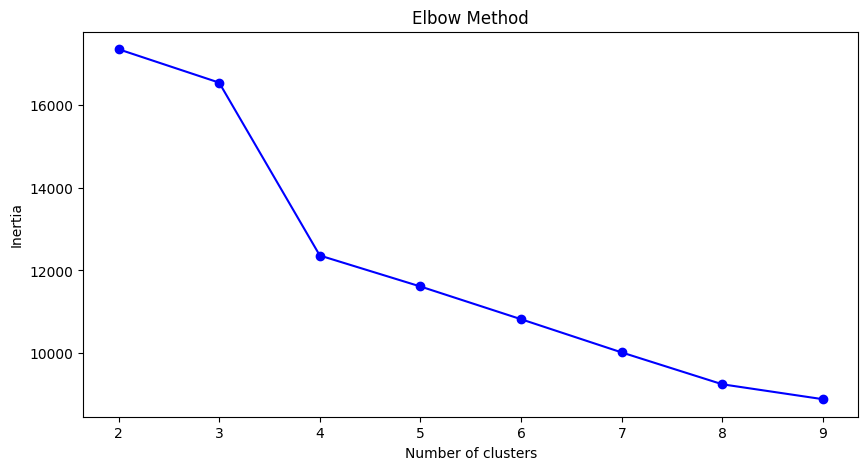

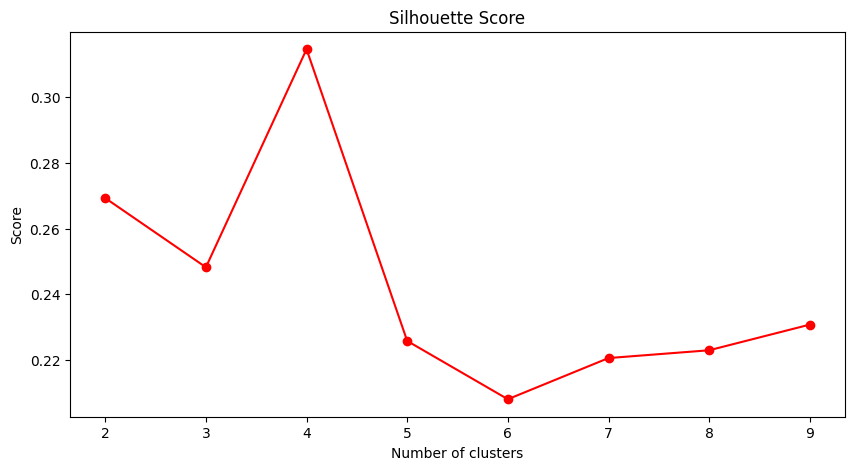

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
sil_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(K, sil_scores, 'ro-')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()


In [ ]:
best_k = 3  # (Change based on your Elbow/Silhouette results)
kmeans = KMeans(n_clusters=best_k, random_state=42)
df_fe['cluster_id'] = kmeans.fit_predict(X_scaled)

In [ ]:
# Compare clusters vs genuine label
cluster_summary = df_fe.groupby('cluster_id')['genuine_label'].value_counts(normalize=True).unstack().fillna(0)
print(cluster_summary)

# Examine feature means per cluster
feature_means = df_fe.groupby('cluster_id')[features_for_clustering].mean()
print(feature_means.head())


genuine_label       0.0       1.0
cluster_id                       
0              0.526531  0.473469
1              0.290909  0.709091
2              0.020761  0.979239
               price  discount  average_rating  num_reviews  review_variance  \
cluster_id                                                                     
0           0.343632  0.382749       -0.343126     0.380158         1.349776   
1           0.075590  0.050971       -0.169074     0.015191         1.221964   
2          -0.888327 -0.983129        0.904834    -0.969730         0.708339   

            description_keywords  title_similarity  image_quality_score  \
cluster_id                                                                
0                            NaN          0.695257             0.656158   
1                            NaN          0.721218             0.716445   
2                            NaN          0.885488             0.866891   

            seller_rating  seller_tenure_months  ... 

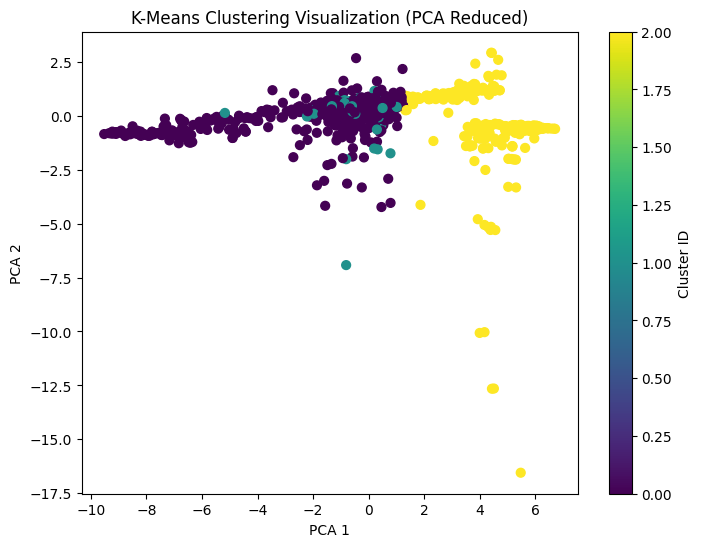

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=df_fe['cluster_id'], cmap='viridis', s=40)
plt.title('K-Means Clustering Visualization (PCA Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster ID')
plt.show()

###ensemble learning

In [ ]:
# Example: make sure your engineered features exist
engineered_features = [
    'discount_strength', 'rating_review_ratio', 'complaint_ratio',
    'return_rating_ratio', 'adjusted_price_ratio', 'seller_trust_score',
    'product_quality_score', 'authenticity_signal', 'cluster_id'
]

# Add only if they exist in your current dataframe
for feat in engineered_features:
    if feat not in df.columns:
        print(f"⚠️ Missing feature: {feat}")


⚠️ Missing feature: discount_strength
⚠️ Missing feature: rating_review_ratio
⚠️ Missing feature: complaint_ratio
⚠️ Missing feature: return_rating_ratio
⚠️ Missing feature: adjusted_price_ratio
⚠️ Missing feature: seller_trust_score
⚠️ Missing feature: product_quality_score
⚠️ Missing feature: authenticity_signal
⚠️ Missing feature: cluster_id


In [ ]:
# Include cluster_id as a feature
X = df_fe.drop(columns=['genuine_label'])
y = df_fe['genuine_label']

In [ ]:
X.columns

Index(['product_id', 'product_name', 'price', 'discount', 'average_rating',
       'num_reviews', 'review_variance', 'description_keywords',
       'title_similarity', 'image_quality_score', 'seller_rating',
       'seller_tenure_months', 'return_rate', 'shipping_time_days',
       'complaint_count', 'verified_seller', 'price_to_market_avg_ratio',
       'rating_to_review_ratio', 'discount_rating_correlation',
       'category_Electronics', 'category_Fashion', 'category_Grocery',
       'category_Home', 'category_Toys', 'discount_strength',
       'rating_review_ratio', 'complaint_ratio', 'return_rating_ratio',
       'adjusted_price_ratio', 'seller_trust_score', 'product_quality_score',
       'authenticity_signal', 'cluster_id'],
      dtype='object')

ENSEMBLE LEARNING

In [ ]:
from sklearn.model_selection import train_test_split

X = df_fe.drop(columns=['genuine_label', 'product_id', 'product_name'])
y = df_fe['genuine_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data Split Successful!")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


✅ Data Split Successful!
Train shape: (863, 31)
Test shape: (216, 31)


In [ ]:
 from sklearn.ensemble import RandomForestClassifier

 rf = RandomForestClassifier(
     n_estimators=200,       # number of trees
     max_depth=None,         # grow trees fully
     min_samples_split=5,
     min_samples_leaf=2,
     class_weight='balanced',  # handle class imbalance
     random_state=42,
     n_jobs=-1
 )

 rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf.predict(X_test)

print("✅ Random Forest Evaluation Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Random Forest Evaluation Results
Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.56      0.63        82
         1.0       0.76      0.87      0.81       134

    accuracy                           0.75       216
   macro avg       0.74      0.71      0.72       216
weighted avg       0.75      0.75      0.74       216


Confusion Matrix:
 [[ 46  36]
 [ 18 116]]


In [ ]:
pip install xgboost


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:23:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("✅ XGBoost Evaluation Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob_xgb))


✅ XGBoost Evaluation Results
Accuracy: 0.7037037037037037

Classification Report:
               precision    recall  f1-score   support

         0.0       0.65      0.49      0.56        82
         1.0       0.73      0.84      0.78       134

    accuracy                           0.70       216
   macro avg       0.69      0.66      0.67       216
weighted avg       0.70      0.70      0.69       216


Confusion Matrix:
 [[ 40  42]
 [ 22 112]]

ROC-AUC Score: 0.8306334182744812


In [ ]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb_model)],
    voting='soft',      # use predicted probabilities (better than hard voting)
    weights=[1, 1.2]    # optional: give slightly higher weight to XGBoost
)

voting_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:23:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=200,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categor...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft', weights=[1, 1.2])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

y_pred_v = voting_model.predict(X_test)
y_prob_v = voting_model.predict_proba(X_test)[:, 1]

print("✅ Voting Ensemble Evaluation Results")
print("Accuracy:", accuracy_score(y_test, y_pred_v))
print("\nClassification Report:\n", classification_report(y_test, y_pred_v))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_v))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob_v))

✅ Voting Ensemble Evaluation Results
Accuracy: 0.7083333333333334

Classification Report:
               precision    recall  f1-score   support

         0.0       0.65      0.50      0.57        82
         1.0       0.73      0.84      0.78       134

    accuracy                           0.71       216
   macro avg       0.69      0.67      0.67       216
weighted avg       0.70      0.71      0.70       216


Confusion Matrix:
 [[ 41  41]
 [ 22 112]]

ROC-AUC Score: 0.8286312340735348


In [ ]:
import joblib
joblib.dump(voting_model, "model.pkl")
print("✅ Model saved as model.pkl")


✅ Model saved as model.pkl


In [ ]:
from google.colab import files
files.download("model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>